In [12]:
import pandas as pd 
import numpy as np 
import tensorflow as tf
import os 
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.models import Sequential ,load_model,Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D,Input,BatchNormalization
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score

In [2]:
path='UTKFace'
images=[]
gender=[]
for img in os.listdir(path):
    gen=img.split("_")[1]
    img=cv2.imread(str(path)+"/"+str(img))
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    images.append(np.array(img))
    gender.append(np.array(gen))


    

In [3]:
images=np.array(images)
gender=np.array(gender,np.uint64)

In [4]:
x_train,x_test,y_train,y_test=train_test_split(images,gender,random_state=42)

In [6]:
model=Sequential()
model.add(Conv2D(36,kernel_size=3,activation='relu', input_shape=(200,200,3)))
model.add(MaxPooling2D(pool_size=3, strides=2))

model.add(Conv2D(64,kernel_size=3,activation='relu'))
model.add(MaxPooling2D(pool_size=3, strides=2))

model.add(Conv2D(128,kernel_size=3,activation='relu'))
model.add(MaxPooling2D(pool_size=3, strides=2))

model.add(Conv2D(256,kernel_size=3,activation='relu'))
model.add(MaxPooling2D(pool_size=3, strides=2))

model.add(Conv2D(512,kernel_size=3,activation='relu'))
model.add(MaxPooling2D(pool_size=3, strides=2))

model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(512,activation='relu'))

model.add(Dense(1,activation='sigmoid', name='gender'))

model.compile(optimizer='adam' ,loss='binary_crossentropy', metrics=['accuracy'])
          


In [7]:
history=model.fit(x_train,y_train ,validation_data=(x_test,y_test) ,epochs=50)

Epoch 1/50
556/556 ━━━━━━━━━━━━━━━━━━━━ 424s 759ms/step - accuracy: 0.6241 - loss: 3.2344 - val_accuracy: 0.7351 - val_loss: 0.5369
Epoch 2/50
556/556 ━━━━━━━━━━━━━━━━━━━━ 439s 789ms/step - accuracy: 0.7577 - loss: 0.5007 - val_accuracy: 0.8173 - val_loss: 0.4037
Epoch 3/50
556/556 ━━━━━━━━━━━━━━━━━━━━ 439s 790ms/step - accuracy: 0.8182 - loss: 0.3986 - val_accuracy: 0.8360 - val_loss: 0.3567
Epoch 4/50
556/556 ━━━━━━━━━━━━━━━━━━━━ 430s 772ms/step - accuracy: 0.8442 - loss: 0.3571 - val_accuracy: 0.8505 - val_loss: 0.3270
Epoch 5/50
556/556 ━━━━━━━━━━━━━━━━━━━━ 447s 782ms/step - accuracy: 0.8487 - loss: 0.3362 - val_accuracy: 0.8502 - val_loss: 0.3272
Epoch 6/50
556/556 ━━━━━━━━━━━━━━━━━━━━ 431s 776ms/step - accuracy: 0.8511 - loss: 0.3210 - val_accuracy: 0.8598 - val_loss: 0.3065
Epoch 7/50
556/556 ━━━━━━━━━━━━━━━━━━━━ 433s 778ms/step - accuracy: 0.8637 - loss: 0.3066 - val_accuracy: 0.8618 - val_loss: 0.3028
Epoch 8/50
556/556 ━━━━━━━━━━━━━━━━━━━━ 430s 773ms/step - accuracy: 0.8667 -

In [8]:
model.save('gender_model_50epochs.h5')

In [20]:
pred=model.predict(x_test)
y_pred=(pred>=0.5).astype(int)[:,0]
y_pred = (y_pred > 0.5).astype(int).flatten()

186/186 ━━━━━━━━━━━━━━━━━━━━ 38s 204ms/step


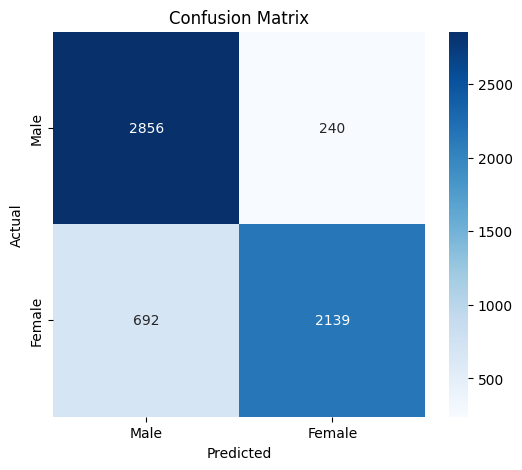

In [23]:

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=['Male','Female'], yticklabels=['Male','Female'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [24]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 198, 198, 36)        │           1,008 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 98, 98, 36)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 96, 96, 64)          │          20,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 47, 47, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 45, 45, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 22, 22, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 20, 20, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 9, 9, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 7, 7, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 3, 3, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gender (Dense)                       │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,793,941 (44.99 MB)

 Trainable params: 3,931,313 (15.00 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 7,862,628 (29.99 MB)